## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Question 3: What is the impact of health-related factors on the proportion of strokes?

Purposes: Understanding how health-related factors contribute to stroke proportions enables a comprehensive risk assessment.This helps in identifying individuals or groups with higher possibility to strokes.

In [2]:
df = pd.read_csv('../data/processed/processed_data.csv')
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.1,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,1


### Pre-processing

We assign the values 0 and 1 to 'No' and 'Yes,' respectively. This mapping provides more meaningful and easily interpretable visual representations.

In [3]:
df['heart_disease'] = df['heart_disease'].map({0:'No', 1:'Yes'}) 
df['hypertension'] = df['hypertension'].map({0:'No', 1:'Yes'}) 

### Analyzing to get the answer

**Step 01:** Four health-related factors—BMI, average glucose level, hypertension, and heart disease—are being considered. To enhance their clarity and relevance, BMI and average glucose level, initially numeric, are being categorized into distinct groups. The proportions of these factors will be visually represented using pie charts for better illustration.

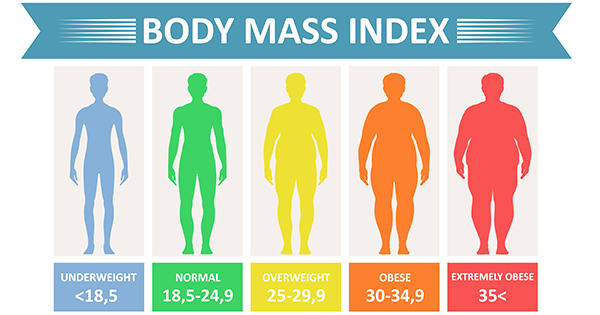  
https://www.cdc.gov

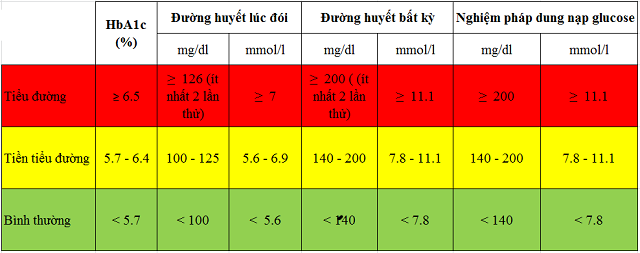  
https://tytphuong3q6.medinet.gov.vn/

In [4]:
strokes_df = df[df['stroke'] == 1]

In [5]:
bins = [0, 18.5, 25, 30, float('inf')]
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obese']
strokes_df['bmi_group'] = pd.cut(strokes_df['bmi'], bins=bins, labels=labels)

In [6]:
bins = [0, 140, 200, float('inf')]
labels = ['Normal', 'Prediabetes', 'Diabetes']
strokes_df['avg_glucose_level_group'] = pd.cut(strokes_df['avg_glucose_level'], bins=bins, labels=labels)

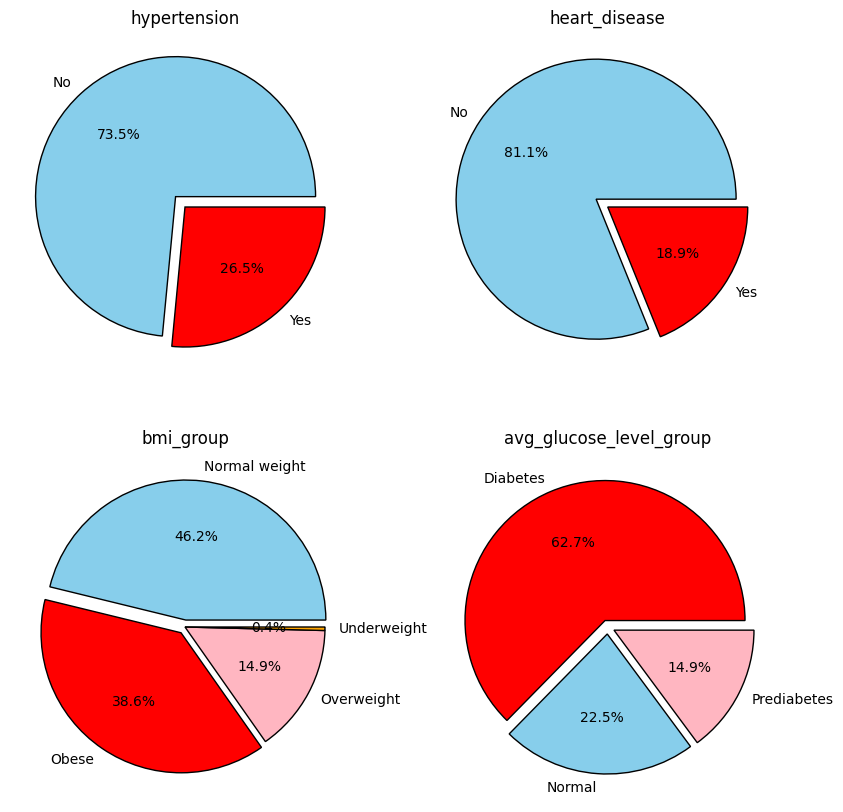

In [7]:
l1 = ['hypertension', 'heart_disease', 'bmi_group', 'avg_glucose_level_group']
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i in range(2):
    axs[0][i].pie(strokes_df[l1[i]].value_counts(), labels=sorted(strokes_df[l1[i]].unique()), explode=[0.1, 0], 
               wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True}, colors=["skyblue", "red"], autopct="%1.1f%%")
    axs[0][i].set_title(l1[i])

axs[1][0].pie(strokes_df[l1[2]].value_counts(), labels=sorted(strokes_df[l1[2]].unique()), explode=[0.05, 0.05, 0, 0], 
            wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True}, colors=["skyblue", "red", "lightpink", "orange"], autopct="%1.1f%%")
axs[1][0].set_title(l1[2])

axs[1][1].pie(strokes_df[l1[3]].value_counts(), labels=sorted(strokes_df[l1[3]].unique()), explode=[0.05, 0.05, 0.05], 
            wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True}, colors=["red", "skyblue", "lightpink"], autopct="%1.1f%%")
axs[1][1].set_title(l1[3])

plt.show()

**Observation:** Hypertension shows a greater likelihood of stroke compared to heart disease. Notably, individuals classified as overweight or obese exhibit a significantly higher proportion of strokes. Moreover, among those who experienced strokes, around two-thirds were individuals with diabetes, marking this observation as particularly significant.

**Step 02:** We delve further into the analysis of obesity and diabetes, examining the comparison between genders.

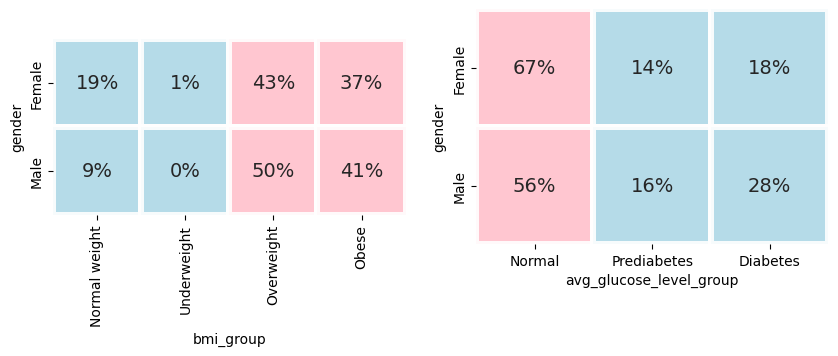

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(10, 10))

gender_order = ['Female','Male']
bmi_group_order = ["Normal weight", "Underweight", "Overweight", "Obese"]
stroke_bmi = pd.crosstab(strokes_df['gender'], [strokes_df['bmi_group']],normalize='index').loc[gender_order, bmi_group_order]
sns.heatmap(data=stroke_bmi, linewidths= 0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, linewidth=3, annot=True, fmt='1.0%', annot_kws={"fontsize":14}, alpha = 0.9, cmap = ["lightblue","pink"], ax=axs[0])

avg_glucose_group_order = ["Normal", "Prediabetes", "Diabetes"]
stroke_avg_glucose = pd.crosstab(strokes_df['gender'], [strokes_df['avg_glucose_level_group']],normalize='index').loc[gender_order, avg_glucose_group_order]
sns.heatmap(data=stroke_avg_glucose, linewidths= 0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, linewidth=3, annot=True, fmt='1.0%', annot_kws={"fontsize":14}, alpha = 0.9, cmap = ["lightblue","pink"], ax=axs[1])

plt.show()

**Observation:** A higher prevalence of overweight and obesity is observed among males compared to females. Similarly, the incidence of diabetes is more than 10% higher in males when compared to females.

**Step 03:** Finally, we explore the relationship between age groups and comorbidities. We categorize the data based on age groups and use a heatmap to visually represent the proportions.

In [9]:
df['age_group'] = pd.cut(df['age'], bins=[-1, 20, 40, 60, 100], labels=['0-20','20-40','40-60','60-100'])
cross_tab = pd.crosstab(df['age_group'],df['stroke'])
probability = cross_tab.div(cross_tab.sum(axis=1),axis=0)

df['comorbidities'] = ((df['hypertension'] == 'Yes').astype(int) +
                             (df['avg_glucose_level'] > 140).astype(int) +
                             (df['heart_disease'] == 'Yes').astype(int) +
                             (df['bmi'] > 30).astype(int))
comorbidities_df = df.groupby(['age_group', 'comorbidities'],observed=True)['stroke'].mean().unstack(fill_value=0)

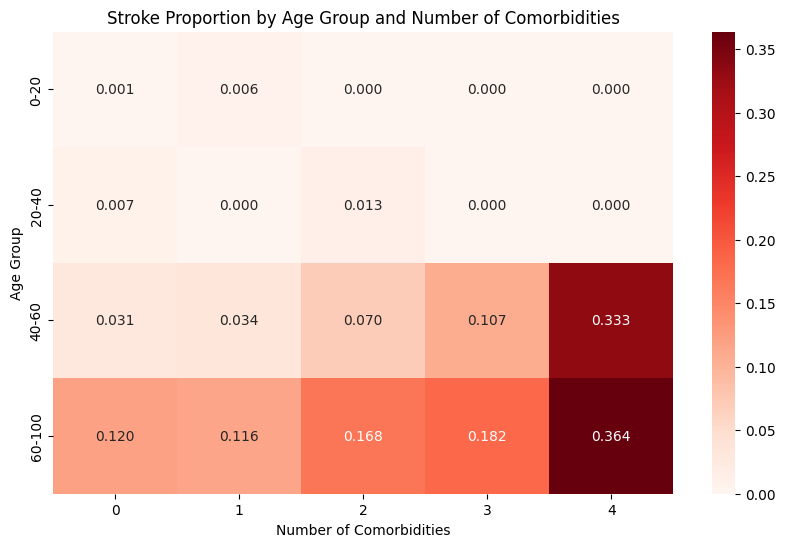

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(comorbidities_df,annot=True,cmap='Reds',fmt=".3f")
plt.title('Stroke Proportion by Age Group and Number of Comorbidities')
plt.ylabel('Age Group')
plt.xlabel('Number of Comorbidities')
plt.show()

**Observation:** Obviously, there is a direct correlation between the number of comorbidities and the likelihood of experiencing a stroke. Additionally, the proportion of strokes tends to increase with higher age.

### Conclusion

- In general, obesity and diabetes emerge as the most significant factors contributing to the risk of stroke, notably with two-thirds of individuals who experienced a stroke having diabetes.
- A higher number of males experience obesity and diabetes compared to females.
- The greater the number of comorbidities and the older an individual is, the increased likelihood of experiencing a stroke.